Bài 1

In [3]:
# Hien thi anh mau
def show_result_color(original, result, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

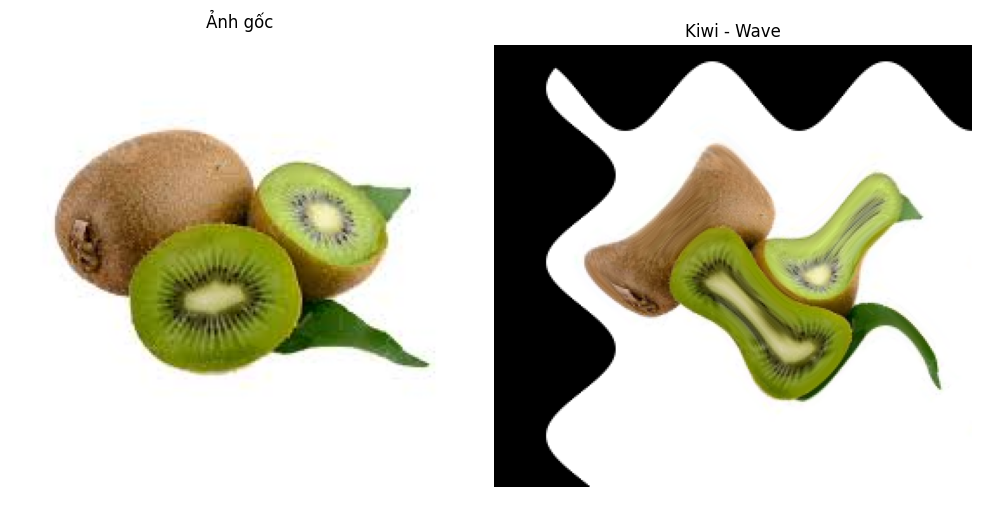

In [7]:
import cv2
import numpy as np
from scipy.ndimage import map_coordinates
import matplotlib.pyplot as plt
from PIL import Image
from skimage.transform import rotate
img = cv2.imread('kiwi.jpg')
M = np.float32([[1, 0, 50], [0, 1, 30]])
translated = cv2.warpAffine(img, M, (img.shape[1]+50, img.shape[0]+30))
x, y = np.meshgrid(np.arange(translated.shape[1]), np.arange(translated.shape[0]))
dx = 20 * np.sin(2 * np.pi * y / 100)
dy = 20 * np.sin(2 * np.pi * x / 100)
coords = np.array([y + dy, x + dx])
wave = np.zeros_like(translated)
for i in range(3):
    wave[..., i] = map_coordinates(translated[..., i], coords, order=1, mode='reflect')
cv2.imwrite('kiwi_wave.jpg', wave)
show_result_color(img, wave, 'Kiwi - Wave')

BAI 2: Gradient + Ghepng PNG

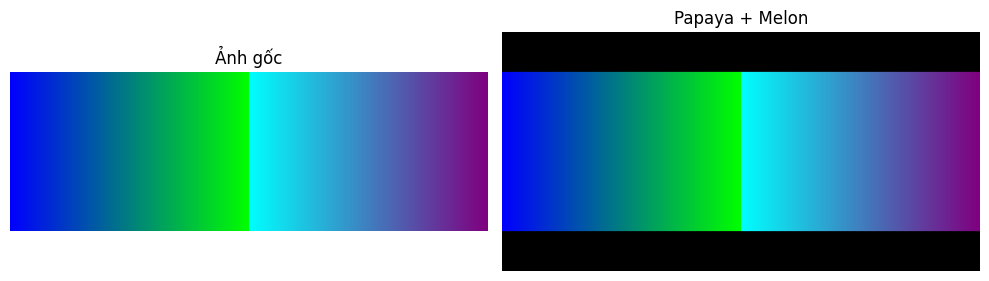

In [8]:
def apply_gradient(shape, start_color, end_color):
    h, w = shape
    alpha = np.linspace(0, 1, w)
    gradient = np.outer(np.ones(h), alpha)
    gradient_img = (start_color * (1 - gradient[..., None]) + end_color * gradient[..., None]).astype(np.uint8)
    return gradient_img

papaya = apply_gradient((200, 300), np.array([255, 0, 0]), np.array([0, 255, 0]))
melon = apply_gradient((200, 300), np.array([255, 255, 0]), np.array([128, 0, 128]))
canvas = np.zeros((300, 600, 4), dtype=np.uint8)
canvas[50:250, 0:300, :3] = papaya
canvas[50:250, 300:600, :3] = melon
canvas[..., 3] = 255
Image.fromarray(canvas).save('fruit_combined.png')
show_result_color(np.hstack((papaya, melon)), canvas[..., :3], 'Papaya + Melon')

BAI 3: Xoay + Phan chieu + Ghep

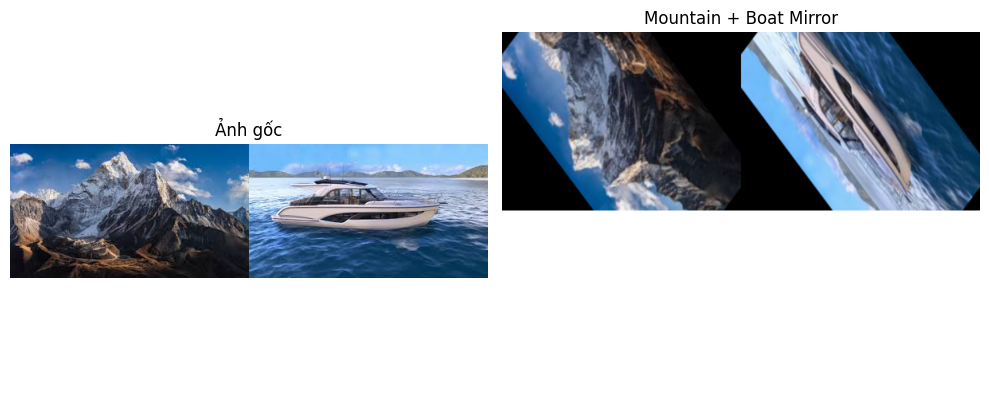

In [10]:
img1 = cv2.imread('mountain.jpg')
img2 = cv2.imread('boat.jpg')
img1_rot = rotate(img1, 45, resize=False, preserve_range=True).astype(np.uint8)
img2_rot = rotate(img2, 45, resize=False, preserve_range=True).astype(np.uint8)
img1_mirror = cv2.flip(img1_rot, 0)
img2_mirror = cv2.flip(img2_rot, 0)
canvas = np.ones((600, 800, 3), dtype=np.uint8) * 255
canvas[0:300, 0:400] = cv2.resize(img1_mirror, (400, 300))
canvas[0:300, 400:800] = cv2.resize(img2_mirror, (400, 300))
cv2.imwrite('mountain_boat_mirror.jpg', canvas)
show_result_color(np.hstack((img1, img2)), canvas, 'Mountain + Boat Mirror')

In [ ]:
BAI 4: Phong to + Hieu ung uon

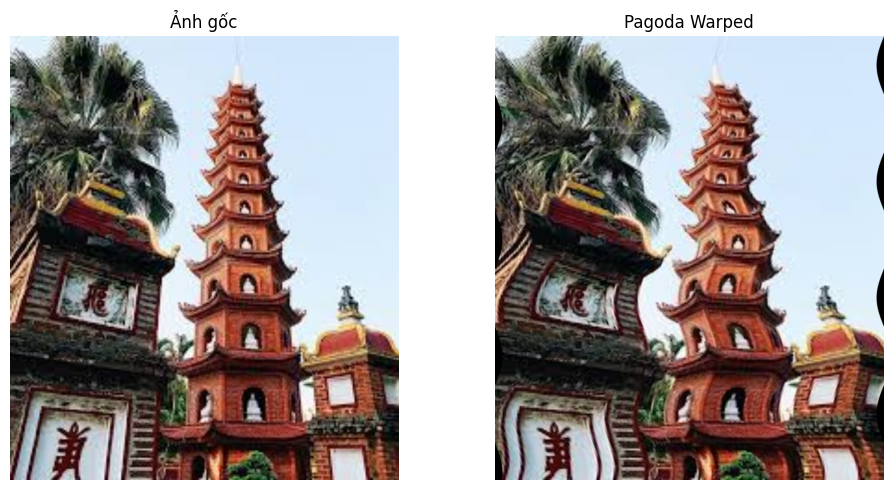

In [11]:
img = cv2.imread('pagoda.jpg')
scaled = cv2.resize(img, None, fx=5, fy=5)
rows, cols = scaled.shape[:2]
map_y, map_x = np.indices((rows, cols), dtype=np.float32)
map_x += 20 * np.sin(map_y / 50)
warped = cv2.remap(scaled, map_x, map_y, interpolation=cv2.INTER_LINEAR)
cv2.imwrite('pagoda_warped.jpg', warped)
show_result_color(scaled, warped, 'Pagoda Warped')

BAI 5: Menu tuong tac voi anh mau

Chọn ảnh:
0 - kiwi
1 - boat
2 - pagoda

Chọn biến đổi:
1 - Tịnh tiến
2 - Xoay
3 - Zoom
4 - Làm mờ
5 - Biến dạng sóng


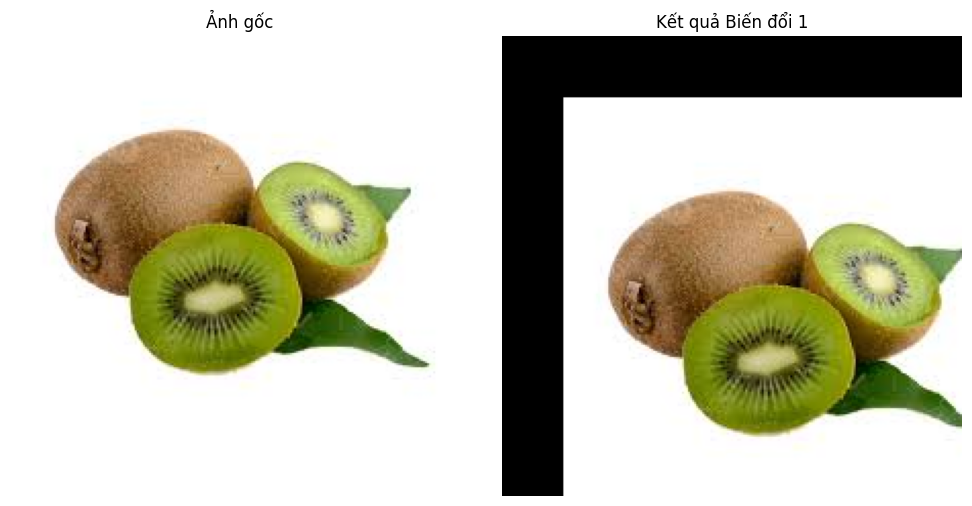

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from skimage.transform import rotate

def show_result(img_original, img_result, title=''):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB))
    plt.title("Ảnh gốc")
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB))
    plt.title("Kết quả " + title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

def translate(img, dx, dy):
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    return cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

def rotate_img(img, angle, reshape):
    return rotate(img, angle, resize=reshape, preserve_range=True).astype(np.uint8)

def scale(img, factor):
    return cv2.resize(img, None, fx=factor, fy=factor)

def gaussian_blur(img, sigma):
    return cv2.GaussianBlur(img, (0, 0), sigma)

def wave(img, amp):
    rows, cols = img.shape[:2]
    map_y, map_x = np.indices((rows, cols), dtype=np.float32)
    map_x += amp * np.sin(map_y / 20)
    result = np.zeros_like(img)
    for i in range(3):
        result[..., i] = cv2.remap(img[..., i], map_x, map_y, interpolation=cv2.INTER_LINEAR)
    return result

# ========== MENU BÀI 5 ==========
img_paths = ['kiwi.jpg', 'boat.jpg', 'pagoda.jpg']
print("Chọn ảnh:\n0 - kiwi\n1 - boat\n2 - pagoda")

# Nhập ảnh
try:
    idx = int(input(">> ").strip() or "0")
    if idx < 0 or idx >= len(img_paths):
        raise IndexError
except (ValueError, IndexError):
    print("Lựa chọn không hợp lệ. Mặc định dùng ảnh kiwi.")
    idx = 0

img = cv2.imread(img_paths[idx])
if img is None:
    raise FileNotFoundError(f"Không tìm thấy ảnh '{img_paths[idx]}'. Hãy kiểm tra lại tên file và đường dẫn.")

# Menu chọn biến đổi
print("\nChọn biến đổi:")
print("1 - Tịnh tiến")
print("2 - Xoay")
print("3 - Zoom")
print("4 - Làm mờ")
print("5 - Biến dạng sóng")

try:
    op = int(input(">> ").strip())
except ValueError:
    print("Lựa chọn không hợp lệ. Thoát chương trình.")
    exit()

# Thực hiện biến đổi tương ứng
if op == 1:
    dx = int(input("dx = "))
    dy = int(input("dy = "))
    out = translate(img, dx, dy)
elif op == 2:
    angle = float(input("Góc xoay (độ): "))
    reshape = input("Reshape (True/False): ").strip().lower() == 'true'
    out = rotate_img(img, angle, reshape)
elif op == 3:
    factor = float(input("Hệ số zoom: "))
    out = scale(img, factor)
elif op == 4:
    sigma = float(input("Giá trị sigma: "))
    out = gaussian_blur(img, sigma)
elif op == 5:
    amp = float(input("Biên độ sóng: "))
    out = wave(img, amp)
else:
    print("Lựa chọn không hợp lệ. Thoát chương trình.")
    exit()

show_result(img, out, f"Biến đổi {op}")
